# Feature extraction

In [1]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from scipy.spatial import distance
from keras.models import Model
import numpy as np

import os

Using TensorFlow backend.


# Use model VGG19

In [3]:
model = VGG19(weights='imagenet', include_top=False)
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

# Create a list of pre -existing names of persond whose pictures will be recognised

In [4]:
name_list=['vidit' , 'ekta','ayush']
#print(name_list[1])

# Declare path for images

In [5]:
img_path='vidit.jpg'
img_path_1 = 'ekta.jpg'
img_path_2 = 'test_img_7.jpg'

# Plot picture vidit

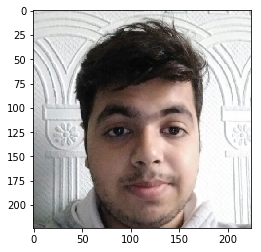

In [6]:
import matplotlib.pyplot as plt

photo_vidit = image.load_img(img_path, target_size=(224,224))
plt.imshow(photo_vidit)
plt.show()

# Plot picture ekta

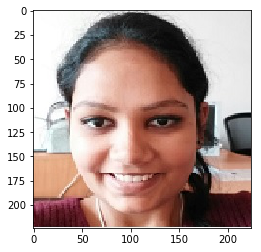

In [7]:
photo_ekta = image.load_img(img_path_1, target_size=(224,224))
plt.imshow(photo_ekta)
plt.show()

# Plot picture Ayush

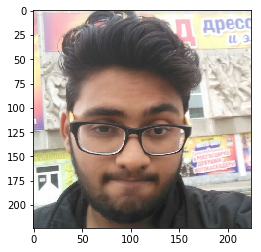

In [8]:
photo_ayush = image.load_img(img_path_2, target_size=(224,224))
plt.imshow(photo_ayush)
plt.show()

# Preprocess image -vidit

In [9]:
x_vidit= image.img_to_array(photo_vidit)
x_vidit=np.expand_dims(x_vidit,axis=0)
x_vidit=preprocess_input(x_vidit)


# preprocess image ekta

In [10]:
x_ekta = image.img_to_array(photo_ekta)
x_ekta = np.expand_dims(x_ekta , axis=0)
x_ekta= preprocess_input(x_ekta)


# Preprocess image ayush

In [11]:
x_ayush= image.img_to_array(photo_ayush)
x_ayush=np.expand_dims(x_ayush,axis=0)
x_ayush=preprocess_input(x_ayush)


# Extraction of feature vectors

# Method for feature vector extraction



In [12]:
def extract_feature_vector(feature_name):
    features=model.predict(feature_name)
    print(type(features))
    print(features.shape)
    return features

In [13]:
feature_vidit = extract_feature_vector(x_vidit)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


In [14]:
feature_ekta = extract_feature_vector(x_ekta)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


In [15]:
feature_ayush = extract_feature_vector(x_ayush)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


# save the features vector

# Definng method for saving feature vectors in a file

In [17]:
'''filename = 'outarray.h5'
ROW_SIZE = 7
NUM_COLUMNS = 7

f = tables.open_file(filename, mode='w')
atom = tables.Float64Atom()

array_c = f.create_earray(f.root, 'data', atom, (0, ROW_SIZE))

for idx in range(NUM_COLUMNS):
    x = np.random.rand(1, ROW_SIZE)
    array_c.append(x)
f.close()'''
def save_feat_vector(file_name,name):
    #print(name.shape)
    f_handle = open(file_name+'.npy', 'wb')
    np.save(f_handle,name )
    f_handle.close()
    

In [18]:
save_feat_vector('vidit_feat_vector' , feature_vidit)


In [19]:
save_feat_vector('ekta_feat_vector', feature_ekta)

In [20]:
save_feat_vector('ayush_feat_vector',feature_ayush)

# Load saved data

In [21]:
# Load vidit saved feature vector
load_feature_vidit = np.load('vidit_feat_vector.npy')
print(type(load_feature_vidit))
print(load_feature_vidit.shape)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


In [22]:
# Load vidit saved feature vector
load_feature_ekta = np.load('ekta_feat_vector.npy')
print(type(load_feature_ekta))
print(load_feature_ekta.shape)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


In [23]:
# Load vidit saved feature vector
load_feature_ayush = np.load('ayush_feat_vector.npy')
print(type(load_feature_ayush))
print(load_feature_ayush.shape)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


# Calculate distance between 3 pics

In [24]:
## lets calculate distance between vidit- ekta above photos

a = distance.euclidean(load_feature_vidit.flatten(), load_feature_ekta.flatten())
print(a)

## lets calculate distance between ayush- ekta above photos

b = distance.euclidean(load_feature_ekta.flatten(), load_feature_ayush.flatten())
print(b)

## lets calculate distance between vidit- ayush above photos

c = distance.euclidean(load_feature_vidit.flatten(), load_feature_ayush.flatten())
print(c)



1405.8404541015625
1449.3837890625
1118.5906982421875


# Try to recognise new pic

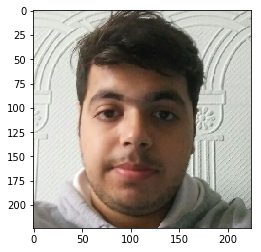

In [25]:
test_img='test_img.jpg'
photo_check = image.load_img(test_img, target_size=(224,224))
plt.imshow(photo_check)
plt.show()

In [26]:
x_check= image.img_to_array(photo_check)
x_check=np.expand_dims(x_check,axis=0)
x_check=preprocess_input(x_check)

feature_check = model.predict(x_check)

#print(feature_check)
print(type(feature_check))
print(feature_check.shape)

<class 'numpy.ndarray'>
(1, 7, 7, 512)


In [27]:
##check the image and reccognise

## let us check whose image is this ????

pic_vidit = distance.euclidean(feature_check.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])





851.0272216796875
1338.8773193359375
1046.646484375
MIN distance is : 851.0272216796875
Picture is of : vidit


# For test_img : Right recognition
pic : vidit


recognised_pic : vidit

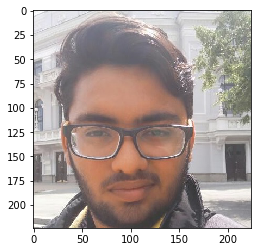

In [28]:
## trying other image

test_img_1='test_img_1.jpg'
photo_check_1 = image.load_img(test_img_1, target_size=(224,224))
plt.imshow(photo_check_1)
plt.show()

In [29]:
x_check_1= image.img_to_array(photo_check_1)
x_check_1=np.expand_dims(x_check_1,axis=0)
x_check_1=preprocess_input(x_check_1)

feature_check_1 = model.predict(x_check_1)

#print(feature_check_1)
print(type(feature_check_1))
print(feature_check_1.shape)


pic_vidit = distance.euclidean(feature_check_1.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_1.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_1.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])






<class 'numpy.ndarray'>
(1, 7, 7, 512)
1260.1834716796875
1550.4154052734375
1228.3609619140625
MIN distance is : 1228.3609619140625
Picture is of : ayush


#  For test_img_1 : Right Recognition
pic : ayush

recognise_pic : ayush

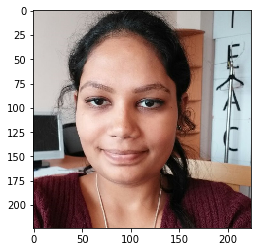

In [30]:
## Trying 3 rd image
test_img_2='test_img_2.jpg'
photo_check_2 = image.load_img(test_img_2, target_size=(224,224))
plt.imshow(photo_check_2)
plt.show()

In [31]:
x_check_2= image.img_to_array(photo_check_2)
x_check_2=np.expand_dims(x_check_2,axis=0)
x_check_2=preprocess_input(x_check_2)

feature_check_2 = model.predict(x_check_2)

#print(feature_check_2)
print(type(feature_check_2))
print(feature_check_2.shape)


pic_vidit = distance.euclidean(feature_check_2.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_2.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_2.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])





<class 'numpy.ndarray'>
(1, 7, 7, 512)
1244.2581787109375
1463.97900390625
1256.4405517578125
MIN distance is : 1244.2581787109375
Picture is of : vidit


# For test_img2 : Wrong Recognition
pic : ekta

pic_recognised : vidit

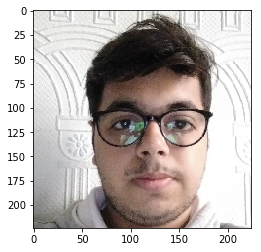

<class 'numpy.ndarray'>
(1, 7, 7, 512)
751.962646484375
1350.3592529296875
1078.7762451171875
MIN distance is : 751.962646484375
Picture is of : vidit


In [32]:
## test_img_3

test_img_3='test_img_3.jpg'
photo_check_3 = image.load_img(test_img_3, target_size=(224,224))
plt.imshow(photo_check_3)
plt.show()

x_check_3= image.img_to_array(photo_check_3)
x_check_3=np.expand_dims(x_check_3,axis=0)
x_check_3=preprocess_input(x_check_3)

feature_check_3 = model.predict(x_check_3)

#print(feature_check_3)
print(type(feature_check_3))
print(feature_check_3.shape)


pic_vidit = distance.euclidean(feature_check_3.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_3.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_3.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])






# # For test_img3 : Right Recognition
pic : vidit

pic_recognised : vidit

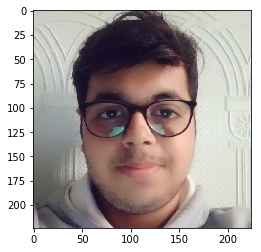

<class 'numpy.ndarray'>
(1, 7, 7, 512)
805.6611938476562
1290.5867919921875
1037.6962890625
MIN distance is : 805.6611938476562
Picture is of : vidit


In [33]:
##test_img_4

## test_img_4

test_img_4='test_img_4.jpg'
photo_check_4 = image.load_img(test_img_4, target_size=(224,224))
plt.imshow(photo_check_4)
plt.show()

x_check_4= image.img_to_array(photo_check_4)
x_check_4=np.expand_dims(x_check_4,axis=0)
x_check_4=preprocess_input(x_check_4)

feature_check_4 = model.predict(x_check_4)

#print(feature_check_4)
print(type(feature_check_4))
print(feature_check_4.shape)


pic_vidit = distance.euclidean(feature_check_4.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_4.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_4.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])







#  For test_img4 : Right Recognition
pic : vidit


pic_recognised : vidit

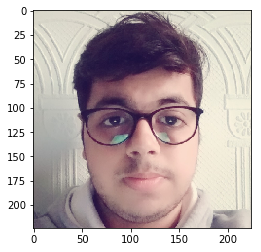

<class 'numpy.ndarray'>
(1, 7, 7, 512)
724.3171997070312
1294.813720703125
1024.357421875
MIN distance is : 724.3171997070312
Picture is of : vidit


In [34]:
## test_img_5

test_img_5='test_img_5.jpg'
photo_check_5 = image.load_img(test_img_5, target_size=(224,224))
plt.imshow(photo_check_5)
plt.show()

x_check_5= image.img_to_array(photo_check_5)
x_check_5=np.expand_dims(x_check_5,axis=0)
x_check_5=preprocess_input(x_check_5)

feature_check_5 = model.predict(x_check_5)

#print(feature_check_5)
print(type(feature_check_5))
print(feature_check_5.shape)


pic_vidit = distance.euclidean(feature_check_5.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_5.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_5.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])







#   For test_img5 : Right Recognition
pic : vidit

pic_recognised : vidit

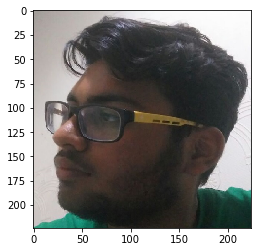

<class 'numpy.ndarray'>
(1, 7, 7, 512)
1145.77099609375
1453.4197998046875
1133.3248291015625
MIN distance is : 1133.3248291015625
Picture is of : ayush


In [35]:
#test_img_6

test_img_6='validation_pics/ayush_left.jpg'
photo_check_6 = image.load_img(test_img_6, target_size=(224,224))
plt.imshow(photo_check_6)
plt.show()

x_check_6= image.img_to_array(photo_check_6)
x_check_6=np.expand_dims(x_check_6,axis=0)
x_check_6=preprocess_input(x_check_6)

feature_check_6 = model.predict(x_check_6)

#print(feature_check_6)
print(type(feature_check_6))
print(feature_check_6.shape)


pic_vidit = distance.euclidean(feature_check_6.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_6.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_6.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])








# for test_img6 : Right recognition
pic : ayush

recognise_pic : ayush

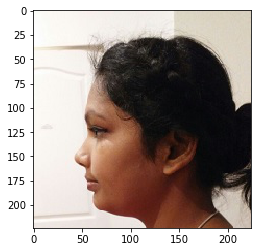

<class 'numpy.ndarray'>
(1, 7, 7, 512)
1187.05908203125
1495.02001953125
1256.468017578125
MIN distance is : 1187.05908203125
Picture is of : vidit


In [36]:
#test_img_7

test_img_7='validation_pics/ekta_left.jpg'
photo_check_7 = image.load_img(test_img_7, target_size=(224,224))
plt.imshow(photo_check_7)
plt.show()

x_check_7= image.img_to_array(photo_check_7)
x_check_7=np.expand_dims(x_check_7,axis=0)
x_check_7=preprocess_input(x_check_7)

feature_check_7 = model.predict(x_check_7)

#print(feature_check_7)
print(type(feature_check_7))
print(feature_check_7.shape)


pic_vidit = distance.euclidean(feature_check_7.flatten(), load_feature_vidit.flatten())
print(pic_vidit)
pic_ekta = distance.euclidean(feature_check_7.flatten(), load_feature_ekta.flatten())
print(pic_ekta)
pic_ayush = distance.euclidean(feature_check_7.flatten(), load_feature_ayush.flatten())
print(pic_ayush)

list_dist=[pic_vidit , pic_ekta, pic_ayush]
print("MIN distance is :" ,min(pic_vidit, pic_ekta, pic_ayush) )
name = list_dist.index(min(list_dist))
print("Picture is of :", name_list[name])








# for test_img7 : Right recognition
pic : ekta

recognise_pic : vidit

# Accuracy : Right - 6/8


# Wrong - 2/8